## Add Multiple Decay Channels (Like Real Particles)
### Real particles can decay in different ways. Example: B meson can decay to:

- #### π⁺π⁻ (60% of the time)
- #### K⁺π⁻ (30% of the time)
- #### Other (10% of the time)

In [13]:
import numpy as np

In [18]:
def simulate_decay_with_channels(N, decay_constant, branching_ratios):
    """
    Simulate particle decay with multiple decay channels.
    
    Parameters:
    - N: number of particles
    - decay_constant: overall decay rate/
    - branching_ratios: dict like {'channel1': 0.6, 'channel2': 0.3, 'channel3': 0.1}
    """
    # Generate decay times
    decay_times = np.random.exponential(scale=1/decay_constant, size=N)
    
    # Assign decay channels based on branching ratios
    channels = list(branching_ratios.keys())
    probabilities = list(branching_ratios.values())
    decay_channels = np.random.choice(channels, size=N, p=probabilities)
    
    # Create results dictionary
    results = {
        'times': decay_times,
        'channels': decay_channels
    }
    
    return results

# Example usage
branching_ratios = {
    'π⁺π⁻': 0.6,
    'K⁺π⁻': 0.3,
    'Other': 0.1
}

results = simulate_decay_with_channels(10000, 0.1, branching_ratios)

# Analyze by channel
for channel in branching_ratios.keys():
    mask = results['channels'] == channel
    channel_times = results['times'][mask]
    print(f"{channel}: {len(channel_times)} decays, "
          f"mean time = {np.mean(channel_times):.5f} s")

π⁺π⁻: 6063 decays, mean time = 10.22540 s
K⁺π⁻: 2940 decays, mean time = 9.90769 s
Other: 997 decays, mean time = 10.19299 s


STATISTICAL ANALYSIS
Number of particles: 10000
Simulated mean lifetime: 10.1288 s
Theoretical mean lifetime: 10.0000 s
Percentage error: 1.29%
Standard deviation: 10.1498 s
Chi-squared statistic: 0.5253


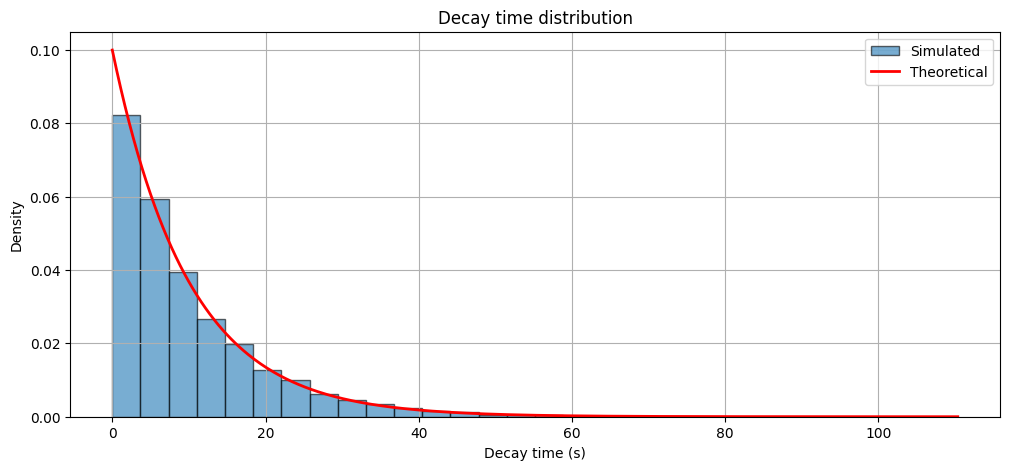

In [30]:
from scipy import stats
import matplotlib.pyplot as plt

def analyze_decay_statistics(decay_times, decay_constant):
    """
    Perform statistical analysis on decay simulation and show a visualization.
    """
    # Calculate statistics
    mean_time = np.mean(decay_times)
    std_time = np.std(decay_times)
    theoretical_mean = 1 / decay_constant
    error = abs(mean_time - theoretical_mean) / theoretical_mean * 100

    # Histogram + expected PDF
    bins = 30
    hist, bin_edges = np.histogram(decay_times, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    expected = decay_constant * np.exp(-decay_constant * bin_centers)
    expected = expected * (bin_edges[1] - bin_edges[0])
    chi2_stat = np.sum((hist - expected)**2 / np.clip(expected, 1e-12, None))

    print("=" * 50)
    print("STATISTICAL ANALYSIS")
    print("=" * 50)
    print(f"Number of particles: {len(decay_times)}")
    print(f"Simulated mean lifetime: {mean_time:.4f} s")
    print(f"Theoretical mean lifetime: {theoretical_mean:.4f} s")
    print(f"Percentage error: {error:.2f}%")
    print(f"Standard deviation: {std_time:.4f} s")
    print(f"Chi-squared statistic: {chi2_stat:.4f}")
    print("=" * 50)

    # Visualization
    plt.figure(figsize=(12,5))
    plt.hist(decay_times, bins=bins, density=True, alpha=0.6, edgecolor='black', label='Simulated')
    x = np.linspace(0, decay_times.max(), 400)
    plt.plot(x, decay_constant * np.exp(-decay_constant * x), 'r-', lw=2, label='Theoretical')
    plt.xlabel('Decay time (s)')
    plt.ylabel('Density')
    plt.title('Decay time distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'mean': mean_time,
        'std': std_time,
        'error_percent': error,
        'chi2': chi2_stat
    }

decay_constant = 0.1  # Lambda (per second)

# Use it
stats_results = analyze_decay_statistics(results['times'], decay_constant)